## PAMAPS database analysis and statistics

In [2]:
# basic
import os 
import sys
import math

# general
import warnings
import numpy as np
import pandas as pd

# visual
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# notebook
from IPython.display import display


**Subject participating in the experiment were asked to perform activities from the list below. Some were optional.\
In practice, there were only 12 activities performed.**

In [1]:
load_activity_map = {}
load_activity_map[0] = 'transient'
load_activity_map[1] = 'lying'
load_activity_map[2] = 'sitting'
load_activity_map[3] = 'standing'
load_activity_map[4] = 'walking'
load_activity_map[5] = 'running'
load_activity_map[6] = 'cycling'
load_activity_map[7] = 'Nordic_walking'
load_activity_map[9] = 'watching_TV'
load_activity_map[10] = 'computer_work'
load_activity_map[11] = 'car driving'
load_activity_map[12] = 'ascending_stairs'
load_activity_map[13] = 'descending_stairs'
load_activity_map[16] = 'vacuum_cleaning'
load_activity_map[17] = 'ironing'
load_activity_map[18] = 'folding_laundry'
load_activity_map[19] = 'house_cleaning'
load_activity_map[20] = 'playing_soccer'
load_activity_map[24] = 'rope_jumping'

CPU times: total: 0 ns
Wall time: 0 ns


**We upload the data from all sensors. These included:\
•	3 IMUs (Internal measurements units) with 100Hz sampling rate. One IMU over the wrist of the dominant arm, one IMU on the chest and one IMU on the dominant side's ankle . Each sensory data contains the following information:**

o	Temperature (°C)\
o	3D-acceleration data (ms-2), scale: ±16g, resolution: 13-bit\
o	3D-acceleration data (ms-2), scale: ±6g, resolution: 13-bit\
o	3D-gyroscope data (rad/s)\
o	3D-magnetometer data (μT)\
o	orientation (invalid in this data collection)\

•	**HR-monitor (heart rate) with sampling rate of 9Hz**

The paper only used the data of the ±16g range accelerometer, gyroscope and magnetometer on the ankle, chest and hand

In [3]:
Data_dir = "./PAMAP2_Dataset/Protocol/"

### loading the data

In [4]:
def generate_three_IMU(name):
    x = name +'_x'
    y = name +'_y'
    z = name +'_z'
    return [x,y,z]

def generate_four_IMU(name):
    x = name +'_x'
    y = name +'_y'
    z = name +'_z'
    w = name +'_w'
    return [x,y,z,w]

def generate_cols_IMU(name):
    # temp
    temp = name+'_temperature'
    output = [temp]
    # acceleration 16
    acceleration16 = name+'_3D_accelerometer_16'
    acceleration16 = generate_three_IMU(acceleration16)
    output.extend(acceleration16)
    # acceleration 6
    acceleration6 = name+'_3D_accelerometer_6'
    acceleration6 = generate_three_IMU(acceleration6)
    output.extend(acceleration6)
    # gyroscope
    gyroscope = name+'_3D_gyroscope'
    gyroscope = generate_three_IMU(gyroscope)
    output.extend(gyroscope)
    # magnometer
    magnometer = name+'_3D_magnetometer'
    magnometer = generate_three_IMU(magnometer)
    output.extend(magnometer)
    # oreintation
    oreintation = name+'_4D_orientation'
    oreintation = generate_four_IMU(oreintation)
    output.extend(oreintation)
    return output

def load_IMU():
    output = ['time_stamp','activity_id', 'heart_rate']
    hand = 'hand'
    hand = generate_cols_IMU(hand)
    output.extend(hand)
    chest = 'chest'
    chest = generate_cols_IMU(chest)
    output.extend(chest)
    ankle = 'ankle'
    ankle = generate_cols_IMU(ankle)
    output.extend(ankle)
    return output
    
def load_subjects(root=Data_dir+'subject'):
    output = pd.DataFrame()
    cols = load_IMU()
    
    for i in range(101,110):
        print ("Loading subject number: {}",format(i))
        path = root + str(i) +'.dat'
        subject = pd.read_table(path, header=None, sep='\s+')
        subject.columns = cols 
        subject['id'] = i
        output = output.append(subject, ignore_index=True)
    output.reset_index(drop=True, inplace=True)
    return output

data = load_subjects()

Loading subject number: {} 101


C:\Users\AYALAR~1\AppData\Local\Temp/ipykernel_10948/520853857.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output = output.append(subject, ignore_index=True)


Loading subject number: {} 102


C:\Users\AYALAR~1\AppData\Local\Temp/ipykernel_10948/520853857.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output = output.append(subject, ignore_index=True)


Loading subject number: {} 103


C:\Users\AYALAR~1\AppData\Local\Temp/ipykernel_10948/520853857.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output = output.append(subject, ignore_index=True)


Loading subject number: {} 104


C:\Users\AYALAR~1\AppData\Local\Temp/ipykernel_10948/520853857.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output = output.append(subject, ignore_index=True)


Loading subject number: {} 105


C:\Users\AYALAR~1\AppData\Local\Temp/ipykernel_10948/520853857.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output = output.append(subject, ignore_index=True)


Loading subject number: {} 106


C:\Users\AYALAR~1\AppData\Local\Temp/ipykernel_10948/520853857.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output = output.append(subject, ignore_index=True)


Loading subject number: {} 107


C:\Users\AYALAR~1\AppData\Local\Temp/ipykernel_10948/520853857.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output = output.append(subject, ignore_index=True)


Loading subject number: {} 108


C:\Users\AYALAR~1\AppData\Local\Temp/ipykernel_10948/520853857.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output = output.append(subject, ignore_index=True)


Loading subject number: {} 109


C:\Users\AYALAR~1\AppData\Local\Temp/ipykernel_10948/520853857.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output = output.append(subject, ignore_index=True)


In [5]:
data.shape

(2872533, 55)

In [6]:
data.head(10)

,time_stamp,activity_id,heart_rate,hand_temperature,hand_3D_accelerometer_16_x,hand_3D_accelerometer_16_y,hand_3D_accelerometer_16_z,hand_3D_accelerometer_6_x,hand_3D_accelerometer_6_y,hand_3D_accelerometer_6_z,...,ankle_3D_gyroscope_y,ankle_3D_gyroscope_z,ankle_3D_magnetometer_x,ankle_3D_magnetometer_y,ankle_3D_magnetometer_z,ankle_4D_orientation_x,ankle_4D_orientation_y,ankle_4D_orientation_z,ankle_4D_orientation_w,id
0,8.38,0,104.0,30.0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1.0,0.0,0.0,0.0,101
1,8.39,0,NaN,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0,101
2,8.40,0,NaN,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0,101
3,8.41,0,NaN,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0,101
4,8.42,0,NaN,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0,101
5,8.43,0,NaN,30.0,2.29959,8.82929,3.54710,2.26132,8.65762,3.77788,...,-0.016024,0.001050,-60.2954,-38.8778,-58.3977,1.0,0.0,0.0,0.0,101
6,8.44,0,NaN,30.0,2.33738,8.82900,3.54767,2.27703,8.77828,3.73230,...,-0.053934,0.015594,-60.6307,-38.8676,-58.2711,1.0,0.0,0.0,0.0,101
7,8.45,0,NaN,30.0,2.37142,9.05500,3.39347,2.39786,8.89814,3.64131,...,-0.039937,-0.000785,-60.5171,-38.9819,-58.2733,1.0,0.0,0.0,0.0,101
8,8.46,0,NaN,30.0,2.33951,9.13251,3.54668,2.44371,8.98841,3.62596,...,-0.010042,0.017701,-61.2916,-39.6182,-58.1499,1.0,0.0,0.0,0.0,101
9,8.47,0,NaN,30.0,2.25966,9.09415,3.43015,2.42877,9.01871,3.61081,...,-0.013923,0.014498,-60.8509,-39.0821,-58.1478,1.0,0.0,0.0,0.0,101


### Data cleaning

We see that there are a lot of label 0 for transient activity - not a true label.\
We remove all of these instances.

To fix potential issues of None values, we interpolate the data (although this is relevant to sensors that are not considered in the model)

In [7]:
# percentage of lables that are not interesting 
Interesting_lables_per = np.count_nonzero(data['activity_id'] == 0) / data.shape[0]
print (Interesting_lables_per)

0.32363805742179463


In [8]:
# Dealing with NAN and removing activity = 0
def fix_data(data):
    data = data.drop(data[data['activity_id']==0].index)
    data = data.interpolate()
    return data

data = fix_data(data)

In [9]:
print('total number of NaN values after interpolation',data.isna().sum().sum())
print('Number of NaN values in heart_rate column',data['heart_rate'].isna().sum())
print('So all NaNs are in heart_rate')

total number of NaN values after interpolation 4
Number of NaN values in heart_rate column 4
So all NaNs are in heart_rate


### General statistics

In [25]:
print('Size of the data: ', data.size)
print('Shape of the data: ', data.shape)
print('Number of columns in the data: ', len(data.columns))
result_id = data.groupby(['id']).mean().reset_index()
print('Number of unique ids in the data: ', len(result_id))
result_act = data.groupby(['activity_id']).mean().reset_index()
print('Numbe of unique activitys in the data: ',len(result_act))

Size of the data:  106857960
Shape of the data:  (1942872, 55)
Number of columns in the data:  55
Number of unique ids in the data:  9
Numbe of unique activitys in the data:  12


In [10]:
data.describe()

,time_stamp,activity_id,heart_rate,hand_temperature,hand_3D_accelerometer_16_x,hand_3D_accelerometer_16_y,hand_3D_accelerometer_16_z,hand_3D_accelerometer_6_x,hand_3D_accelerometer_6_y,hand_3D_accelerometer_6_z,...,ankle_3D_gyroscope_y,ankle_3D_gyroscope_z,ankle_3D_magnetometer_x,ankle_3D_magnetometer_y,ankle_3D_magnetometer_z,ankle_4D_orientation_x,ankle_4D_orientation_y,ankle_4D_orientation_z,ankle_4D_orientation_w,id
count,1.942872e+06,1.942872e+06,1.942868e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,...,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06
mean,1.705202e+03,8.081830e+00,1.074879e+02,3.275126e+01,-4.952973e+00,3.585079e+00,3.602232e+00,-4.886286e+00,3.573597e+00,3.786931e+00,...,-3.652767e-02,6.658552e-03,-3.158971e+01,1.396960e+00,1.725039e+01,3.812299e-01,-8.998437e-03,3.023855e-01,-5.698127e-02,1.045664e+02
std,1.093463e+03,6.174789e+00,2.699218e+01,1.794162e+00,6.239663e+00,6.893705e+00,3.956957e+00,6.245972e+00,6.589666e+00,3.942860e+00,...,6.383285e-01,2.012898e+00,1.834639e+01,2.168678e+01,1.970652e+01,3.036803e-01,5.714335e-01,3.326730e-01,4.800388e-01,2.333052e+00
min,3.120000e+01,1.000000e+00,5.700000e+01,2.487500e+01,-1.453670e+02,-1.043010e+02,-1.014520e+02,-6.121470e+01,-6.184170e+01,-6.193470e+01,...,-1.812690e+01,-1.401960e+01,-1.728650e+02,-1.379080e+02,-1.027160e+02,1.521280e-06,-9.568760e-01,-8.768380e-01,-9.972810e-01,1.010000e+02
25%,7.445400e+02,3.000000e+00,8.600000e+01,3.168750e+01,-8.969760e+00,1.058210e+00,1.161470e+00,-8.866490e+00,1.057690e+00,1.363370e+00,...,-1.066082e-01,-4.416998e-01,-4.171632e+01,-1.248465e+01,3.794668e+00,1.426340e-01,-6.129580e-01,4.914657e-03,-5.378710e-01,1.020000e+02
50%,1.480330e+03,6.000000e+00,1.040000e+02,3.312500e+01,-5.450280e+00,3.526550e+00,3.431410e+00,-5.378515e+00,3.567850e+00,3.662640e+00,...,-3.950165e-03,-2.327570e-03,-3.400820e+01,7.769370e-01,1.876755e+01,2.838390e-01,0.000000e+00,3.055330e-01,0.000000e+00,1.050000e+02
75%,2.663610e+03,1.300000e+01,1.240000e+02,3.406250e+01,-9.577087e-01,6.453505e+00,6.531523e+00,-9.058870e-01,6.458670e+00,6.775980e+00,...,1.162570e-01,9.181807e-02,-1.790600e+01,1.783892e+01,3.121160e+01,5.600202e-01,6.153723e-01,5.960633e-01,4.382870e-01,1.070000e+02
max,4.245680e+03,2.400000e+01,2.020000e+02,3.550000e+01,6.285960e+01,1.556990e+02,1.577600e+02,5.282140e+01,6.225980e+01,6.192340e+01,...,1.358820e+01,1.652880e+01,9.155160e+01,9.424780e+01,1.469000e+02,1.000000e+00,9.595380e-01,9.514820e-01,9.961050e-01,1.090000e+02


### Samples in time domain

Let's look at the readings of the ankle accelerometer in some of the activities

In [12]:
running_data = data[data['activity_id'] == 5]
up_stairs_data = data[data['activity_id'] == 12]
sitting_data = data[data['activity_id'] == 2]

Text(0.5, 0.98, 'Ankle Accelerometer Reading for Different Activities')

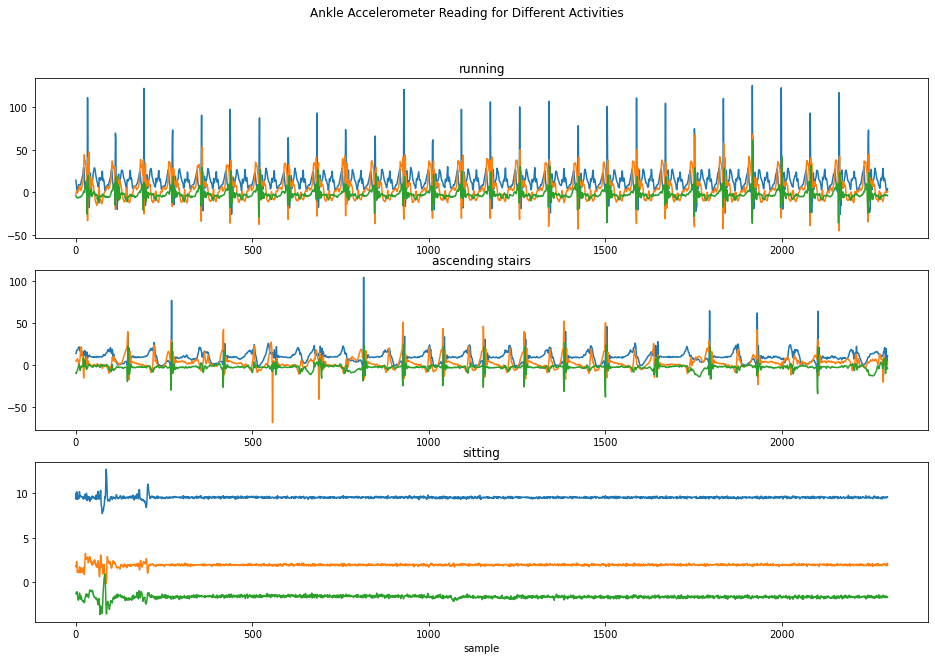

In [27]:
fig, axs = plt.subplots(3, figsize=(16,10))
seg_start = 1200
seg_end = 3500
axs[0].plot(running_data['ankle_3D_accelerometer_16_x'].values[seg_start:seg_end])
axs[0].plot(running_data['ankle_3D_accelerometer_16_y'].values[seg_start:seg_end])
axs[0].plot(running_data['ankle_3D_accelerometer_16_z'].values[seg_start:seg_end])
axs[0].set_title('running')
axs[1].plot(up_stairs_data['ankle_3D_accelerometer_16_x'].values[seg_start:seg_end])
axs[1].plot(up_stairs_data['ankle_3D_accelerometer_16_y'].values[seg_start:seg_end])
axs[1].plot(up_stairs_data['ankle_3D_accelerometer_16_z'].values[seg_start:seg_end])
axs[1].set_title('ascending stairs')
axs[2].plot(sitting_data['ankle_3D_accelerometer_16_x'].values[seg_start:seg_end])
axs[2].plot(sitting_data['ankle_3D_accelerometer_16_y'].values[seg_start:seg_end])
axs[2].plot(sitting_data['ankle_3D_accelerometer_16_z'].values[seg_start:seg_end])
axs[2].set_title('sitting')
axs[2].set_xlabel('sample')
fig.suptitle('Ankle Accelerometer Reading for Different Activities')

**We can appreciate the difference in the amplitude and frequencies captured by this sensor for different activities**

**Below we plot the subject ID, activity ID and timestamp for all sequential data. We can deduce from it that:**
1. Activities were done with the same order for all subjects.
2. There is never a transition between subjects that occured over the same activity. This is important where we come to segment the data into labeled samples.

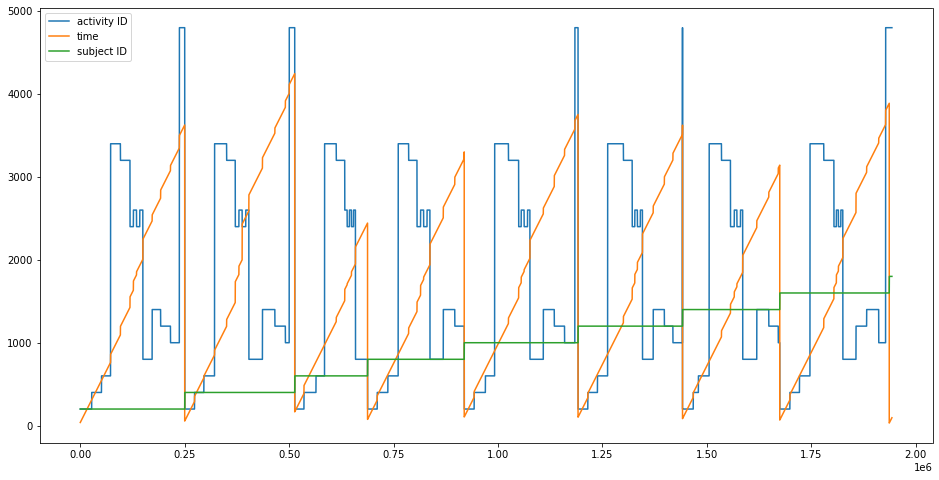

In [24]:
fig, axs = plt.subplots(1, figsize=(16,8))

win = len(data) # 1942872
# axs.plot(20*data['ankle_3D_acceleration_16_x'].values[1:win], label = 'accelerometer')
axs.plot(200*data['activity_id'].values[1:win], label = 'activity ID')
axs.plot(data['time_stamp'].values[1:win], label = 'time')
axs.plot(200*(data['id'].values[1:win]-100), label = 'subject ID')
axs.legend()

### Balance Analysis

We look at how different activities are represented and how different subjects are represented

In [39]:
def pd_fast_plot(pd,column_a,column_b,title, figsize=(10,6)):
    plt.rcParams.update({'font.size': 16})
    size = range(len(pd))
    f, ax = plt.subplots(figsize=figsize) 
    plt.bar(size, pd[column_a], color=plt.cm.Paired(size))
    a = ax.set_xticklabels(pd[column_b], rotation=45, ha='right', rotation_mode='anchor')
    b = ax.legend(fontsize = 20)
    c = ax.set_xticks(np.arange(len(pd)))
    d = ax.set_title(title)
    plt.show()
    return f, ax

C:\Users\AYALAR~1\AppData\Local\Temp/ipykernel_10948/709959073.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  a = ax.set_xticklabels(pd[column_b])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


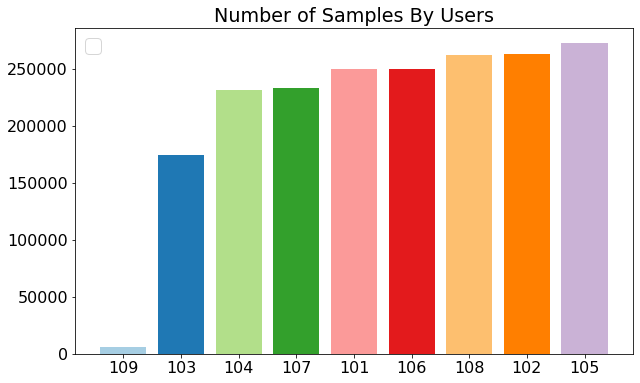

In [33]:
samples = data.groupby(['id'])['time_stamp'].count().reset_index()
samples_to_subject = pd.DataFrame()
samples_to_subject['id'] = samples['id']
samples_to_subject['samples'] = samples['time_stamp']
samples_to_subject = samples_to_subject.sort_values(by=['samples'])
# display(samples)
f, ax = pd_fast_plot(samples_to_subject,'samples','id','Number of Samples By Users')

C:\Users\AYALAR~1\AppData\Local\Temp/ipykernel_10948/3906243274.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  a = ax.set_xticklabels(pd[column_b], rotation=45, ha='right', rotation_mode='anchor')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


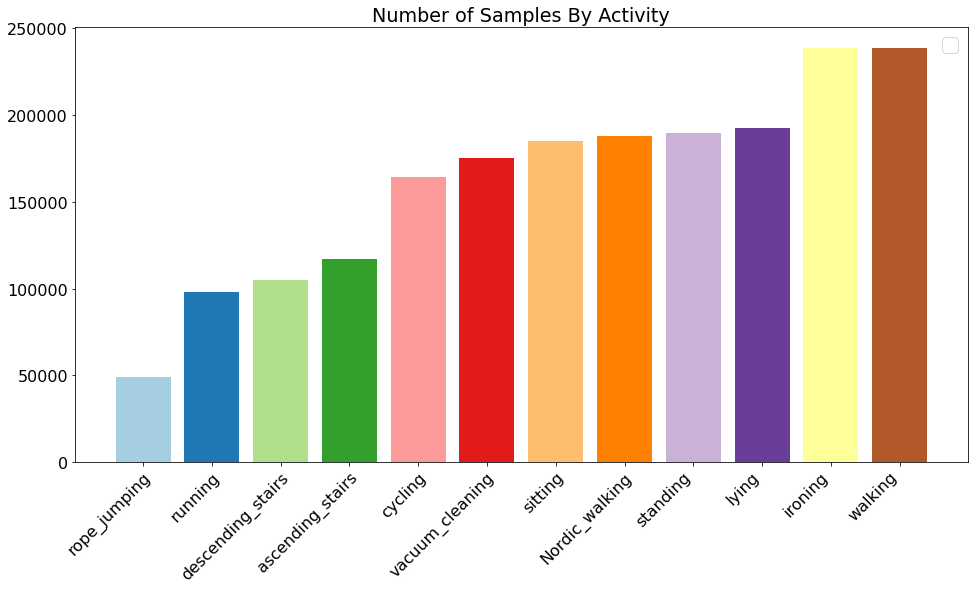

In [41]:
map_ac = load_activity_map
sampels = data.groupby(['activity_id'])['time_stamp'].count().reset_index()
sampels_to_subject = pd.DataFrame()
sampels_to_subject['activity'] = [map_ac[x] for x in sampels['activity_id']]
sampels_to_subject['sampels'] = sampels['time_stamp']
sampels_to_subject = sampels_to_subject.sort_values(by=['sampels'])
# display(samples)
f, ax = pd_fast_plot(sampels_to_subject,'sampels','activity','Number of Samples By Activity',figsize=(16,8))

### Classical features
We could look at classical features for different subjects.\
Some subject may use more force than others...\
For example - here is the median of the intensity for an accelerometer axis reading, during running, for different subjects:

Text(0.5, 1.0, 'Median Force for Accelerometer Axis')

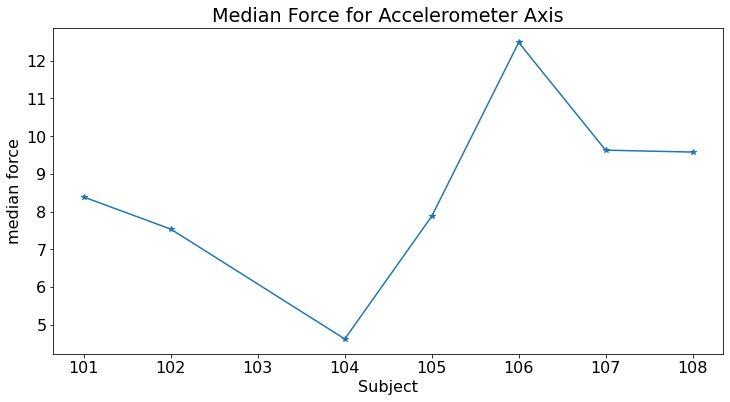

In [79]:
from statistics import median
max_abs_per_id = running_data.groupby('id')['hand_3D_accelerometer_16_x'].apply(lambda x: median(abs(x)))
subjects = running_data.groupby('id')['id'].apply(lambda x: median(x)).values

fig, axs = plt.subplots(1, figsize=(12,6))
axs.plot(subjects, max_abs_per_id, '*-')
axs.set_xlabel('Subject')
axs.set_ylabel('median force')
axs.set_title('Median Force for Accelerometer Axis')


Next, we limit ourselves to the sensors used in the paper

In [71]:
# GILR Based on Documentation Orientation data is not valid
# This means need to remove 4*3 = 12 features 
remove_features = ['hand_4D_orientation_x'  , 'hand_4D_orientation_y'  , 'hand_4D_orientation_z' , 'hand_4D_orientation_w' , \
                   'chest_4D_orientation_x' , 'chest_4D_orientation_y' , 'chest_4D_orientation_z', 'chest_4D_orientation_w', \
                   'ankle_4D_orientation_x' , 'ankle_4D_orientation_y' , 'ankle_4D_orientation_z', 'ankle_4D_orientation_w',\
                    'hand_3D_accelerometer_6_x',	'hand_3D_accelerometer_6_y',	'hand_3D_accelerometer_6_z',\
                    'chest_3D_accelerometer_6_x',	'chest_3D_accelerometer_6_y',	'chest_3D_accelerometer_6_z',\
                    'ankle_3D_accelerometer_6_x',	'ankle_3D_accelerometer_6_y',	'ankle_3D_accelerometer_6_z',\
                    'hand_temperature', 'chest_temperature', 'ankle_temperature', 'heart_rate']
                  
data_lean = data.drop(remove_features, axis=1, inplace = False).reset_index(drop = True)


In [72]:
data_lean.shape

(1942872, 30)

In [73]:
data_lean.head(10)

,time_stamp,activity_id,hand_3D_accelerometer_16_x,hand_3D_accelerometer_16_y,hand_3D_accelerometer_16_z,hand_3D_gyroscope_x,hand_3D_gyroscope_y,hand_3D_gyroscope_z,hand_3D_magnetometer_x,hand_3D_magnetometer_y,...,ankle_3D_accelerometer_16_x,ankle_3D_accelerometer_16_y,ankle_3D_accelerometer_16_z,ankle_3D_gyroscope_x,ankle_3D_gyroscope_y,ankle_3D_gyroscope_z,ankle_3D_magnetometer_x,ankle_3D_magnetometer_y,ankle_3D_magnetometer_z,id
0,37.66,1,2.21530,8.27915,5.58753,-0.004750,0.037579,-0.011145,8.93200,-67.9326,...,9.73855,-1.84761,0.095156,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.3696,101
1,37.67,1,2.29196,7.67288,5.74467,-0.171710,0.025479,-0.009538,9.58300,-67.9584,...,9.69762,-1.88438,-0.020804,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.3656,101
2,37.68,1,2.29090,7.14240,5.82342,-0.238241,0.011214,0.000831,9.05516,-67.4017,...,9.69633,-1.92203,-0.059173,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119,101
3,37.69,1,2.21800,7.14365,5.89930,-0.192912,0.019053,0.013374,9.92698,-67.4387,...,9.66370,-1.84714,0.094385,-0.032514,-0.018844,0.026950,-60.7646,-37.1028,-57.8799,101
4,37.70,1,2.30106,7.25857,6.09259,-0.069961,-0.018328,0.004582,9.15626,-67.1825,...,9.77578,-1.88582,0.095775,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,101
5,37.71,1,2.07165,7.25965,6.01218,0.063895,0.007175,0.024701,8.60505,-66.7184,...,9.65780,-1.92147,-0.098161,0.003793,-0.026906,0.004125,-61.3257,-36.9744,-57.7501,101
6,37.72,1,2.41148,7.59780,5.93915,0.190837,0.003116,0.038762,9.16003,-66.8578,...,9.65839,-1.80756,-0.098862,0.036814,-0.032277,-0.006866,-61.5520,-36.9632,-57.9957,101
7,37.73,1,2.32815,7.63431,5.70686,0.200328,-0.009266,0.068567,9.47898,-67.3025,...,9.65690,-1.88318,-0.136998,-0.010352,-0.016621,0.006548,-61.5738,-36.1724,-59.3487,101
8,37.74,1,2.25096,7.78598,5.62821,0.204098,-0.068256,0.050000,9.15218,-67.0705,...,9.77727,-1.81020,0.133911,0.039346,0.020393,-0.011880,-61.7741,-37.1744,-58.1199,101
9,37.75,1,2.14107,7.52262,5.78141,0.171291,-0.055411,0.021576,9.49746,-66.7700,...,9.69492,-1.76951,-0.137313,0.029874,-0.010763,0.005133,-60.7680,-37.4206,-58.8735,101


### Scaling

A very important issue is correct scaling.\
All sensors here have a fixed range. It is important to scale all axis of a specific sensors together, so that their ratios are preserved.\
We first need to find the maximal scale and then divide all together.

Finding maximal scale:

In [75]:
max_mag = 0
for column in data.columns.values:
    if column.find('accelerometer') != -1:
        # print(column)
        max_temp = max(abs(data[column].values))
        max_mag = max((max_mag, max_temp))

print(max_mag)
max_mag = 0
for column in data.columns.values:
    if column.find('gyroscope') != -1:
        # print(column)
        max_temp = max(abs(data[column].values))
        max_mag = max((max_mag, max_temp))

print(max_mag)
max_mag = 0
for column in data.columns.values:
    if column.find('magnetometer') != -1:
        # print(column)
        max_temp = max(abs(data[column].values))
        max_mag = max((max_mag, max_temp))

print(max_mag)

158.926
28.1354
200.043


Data is then scaled by the factors found above:

In [76]:
for column in data_lean.columns.values:
    if column.find('accelerometer') != -1:
        # print(column)
        data_lean[column] = data_lean[column]/160

    if column.find('gyroscope') != -1:
        # print(column)
        data_lean[column] = data_lean[column]/28

    if column.find('magnetometer') != -1:
        # print(column)
        data_lean[column] = data_lean[column]/200

## We are now ready to prepare our samples!